In [1]:
import statsmodels.api as sn
from sklearn import datasets
import pandas as pd
import numpy as np

data_boston_houses = datasets.load_boston()

In [2]:
boston_df = pd.DataFrame(data_boston_houses.data, columns=data_boston_houses.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston_df_target = pd.DataFrame(data_boston_houses.target, columns=["MEDV"])
boston_df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
x = boston_df["ZN"]
y = boston_df_target["MEDV"]
model_sn = sn.OLS(x,y).fit()

In [7]:
prediction_sn = model_sn.predict(x)

In [8]:
prediction_sn
model_sn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     ZN   R-squared (uncentered):                   0.279
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              195.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):                    8.88e-38
Time:                        19:15:41   Log-Likelihood:                         -2282.3
No. Observations:                 506   AIC:                                      4567.
Df Residuals:                     505   BIC:                                      4571.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEDV           0.5627      0.040     13.980      0.000       0.484       0.642
==============================================================================
Omnibus:                      216.590   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.331
Skew:                           2.108   Prob(JB):                    1.85e-148
Kurtosis:                       6.806   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

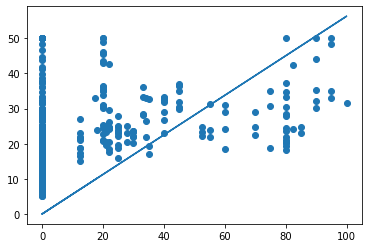

In [10]:
plt.scatter(x,y)
plt.plot(x, prediction_sn)

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv", usecols=['horsepower','price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [13]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [15]:
x_train.shape

(164, 1)

In [17]:
Lin_Reg = LinearRegression()
Lin_Reg.fit(x_train, y_train)

LinearRegression()

In [18]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [19]:
print(Lin_Reg.coef_)
print(Lin_Reg.intercept_)

[[160.52717301]]
[-3499.15271115]


Text(0.5, 1.0, 'Plot Horsepower vs Price')

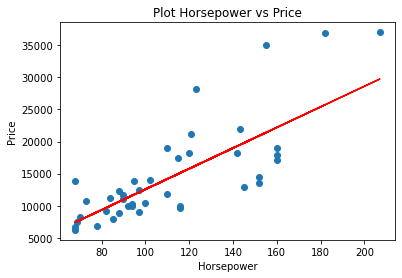

In [21]:
y_prediction = Lin_Reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Plot Horsepower vs Price")

In [23]:
Lin_Reg.predict([[100]])

array([[12553.56458986]])

In [24]:
Lin_Reg.predict([[150]])

array([[20579.92324036]])

In [25]:
Lin_Reg.predict([[200]])

array([[28606.28189087]])